In [2]:
pip install --upgrade pandas numpy scikit-learn matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/14/cf/e382598f98be11bf51dd0bc60eca44a517f6793e3dc8b9d53634a144620c/matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB 330.3 kB/s eta 0:00:25
   ---------------------------------------- 0.0/8.0 MB 262.6 kB/s eta 0:00:31
   ---------------------------------------- 0.1/8.0 MB 327.7 kB/s eta 0:00:25
   ---------------------------------------- 0.1/8.0 MB 363.1 kB/s eta 0:00:22
   ---------------------------------------- 0.1/8.0 MB 374.1 kB/s eta 0:00:22
    --------------------------------------- 0.1/8.0 MB 368.6 kB/s eta 0:00:22
    --------------------------------------- 0.1/8.0 MB 368.6 kB/s eta 0:00:22
    --------------------------------------- 0.1/8.0 MB 368.6 kB/s eta 0:00:22
    ------------

In [1]:
import numpy as np
print(np.__version__)

2.2.2


In [3]:
import pandas as pd
print(pd.__version__)

2.2.3


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
csv_file = 'C:/Users/siyal/Downloads/housing.csv'

In [4]:
data = pd.read_csv(csv_file)

In [5]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [7]:
print(data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [8]:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Missing values in 'total_bedrooms': 1.00%
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


C:\Users\siyal\AppData\Local\Temp\ipykernel_8248\2270803317.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(bedroom_median, inplace=True)
C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


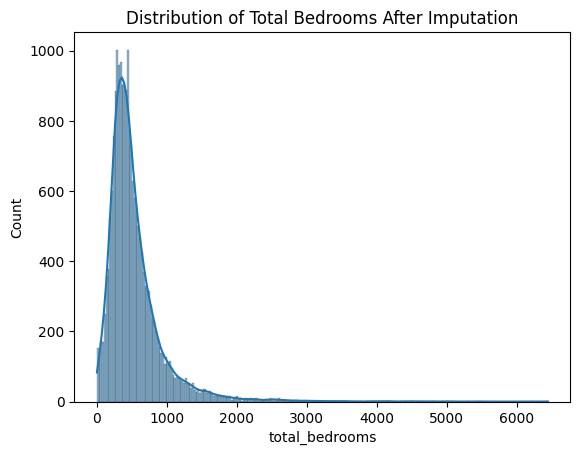

In [9]:
# Check percentage of missing values in 'total_bedrooms'
missing_percent = (data['total_bedrooms'].isnull().sum() / len(data)) * 100
print(f"Missing values in 'total_bedrooms': {missing_percent:.2f}%")

# Fill missing values with the median
bedroom_median = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(bedroom_median, inplace=True)

# Confirm no missing values
print(data.isnull().sum())

# Plot distribution before/after imputation
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['total_bedrooms'], kde=True)
plt.title("Distribution of Total Bedrooms After Imputation")
plt.show()

In [10]:
original_rows = len(data)
data_no_duplicates = data.drop_duplicates()
rows_after_deduplication = len(data_no_duplicates)

duplicate_rows = original_rows - rows_after_deduplication
print(f"Number of duplicate rows: {duplicate_rows}")

# To update the original DataFrame (optional):
data = data.drop_duplicates() # Now 'data' has duplicates removed

Number of duplicate rows: 0


In [11]:
print(data.drop_duplicates())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

# Target Variable Distribution

C:\Users\siyal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


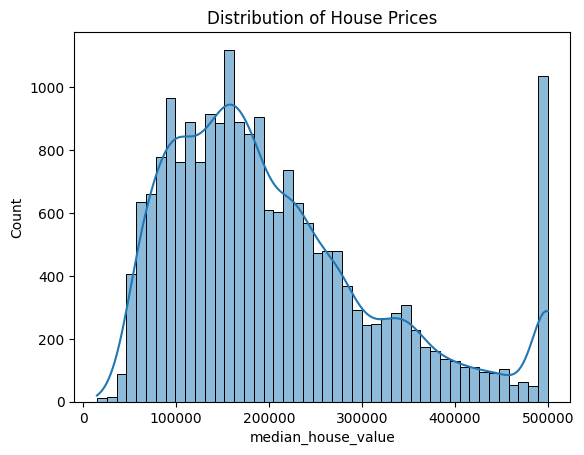

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of house prices
sns.histplot(data=data, x='median_house_value', kde=True)
plt.title("Distribution of House Prices")
plt.show()

# Feature vs. Target Analysis

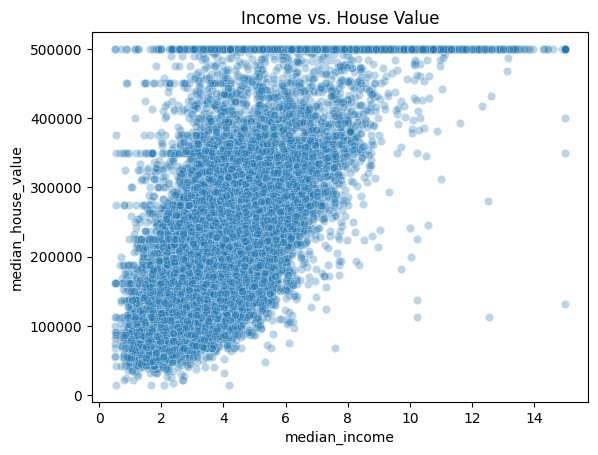

In [13]:
# Example: Scatter plot of median income vs. house value
sns.scatterplot(data=data, x='median_income', y='median_house_value', alpha=0.3)
plt.title("Income vs. House Value")
plt.show()

Outlier Detection

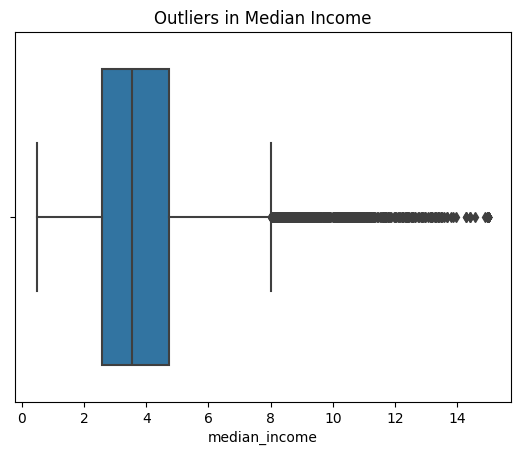

In [14]:
# Boxplot for key features (e.g., median income)
sns.boxplot(data = data, x = 'median_income')
plt.title("Outliers in Median Income")
plt.show()

# Feature Engineering

In [52]:
print(data.columns)
# Example: Rooms per household
data['RoomsPerHousehold'] = data['total_rooms'] / data['households']

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [53]:
data['BedroomsPerRoom'] = data['total_bedrooms'] / data['total_rooms']

In [54]:
data['PopulationPerHousehold'] = data['population'] / data['households']

In [55]:
print(data[['total_rooms', 'households', 'RoomsPerHousehold']].head())

   total_rooms  households  RoomsPerHousehold
0        880.0       126.0           6.984127
1       7099.0      1138.0           6.238137
2       1467.0       177.0           8.288136
3       1274.0       219.0           5.817352
4       1627.0       259.0           6.281853


In [56]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

In [63]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
data = pd.read_csv('C:/Users/siyal/Downloads/housing.csv')

# Check if 'ocean_proximity' exists in the DataFrame
if 'ocean_proximity' not in data.columns:
    print("Error: 'ocean_proximity' column not found in the dataset.")
    print("Available columns:", data.columns)
else:
    # Apply one-hot encoding safely
    data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

    # Show the first few rows after encoding
    print(data.head())

# Save the modified DataFrame (optional)
data.to_csv("processed_data.csv", index=False)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1     

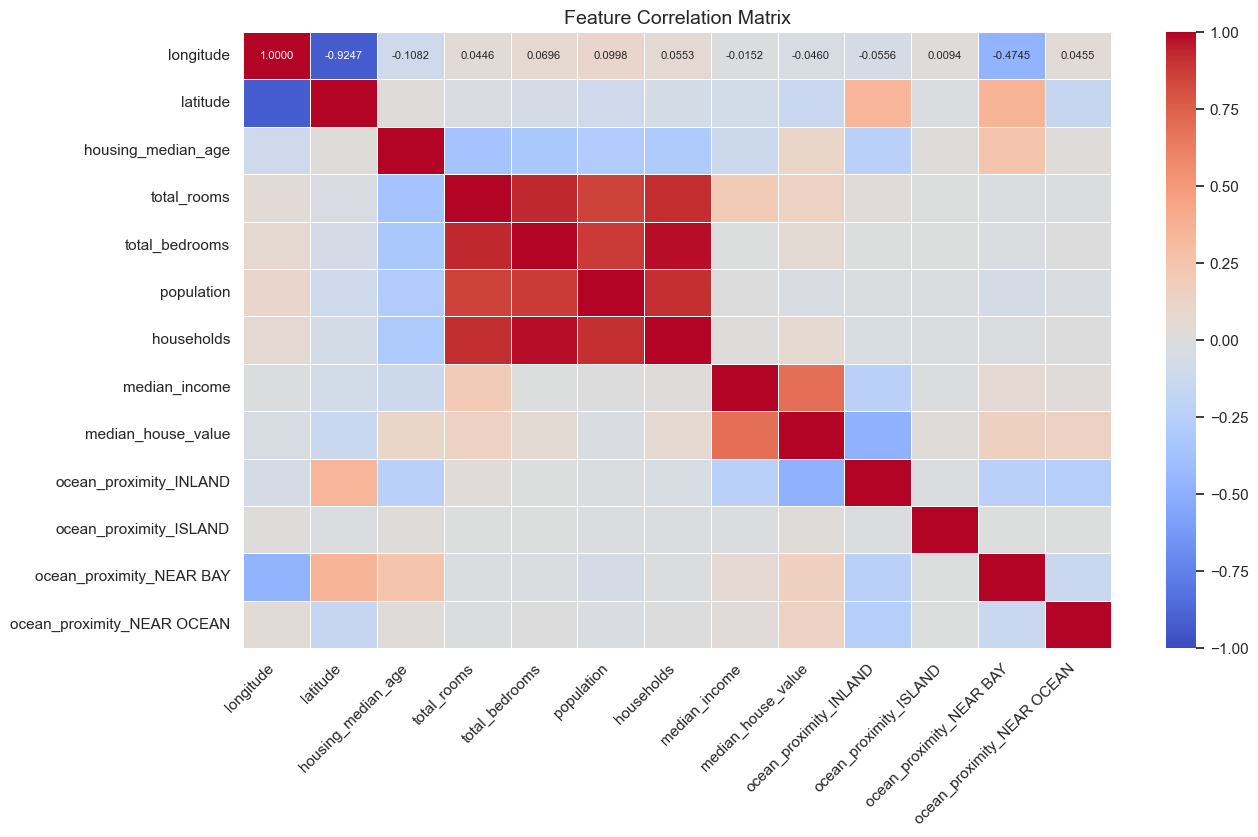

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute correlation matrix
corr_matrix = data.corr()

plt.figure(figsize=(14, 8))  # Larger figure to avoid text overlap

# Create heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,               # Show correlation values
    fmt=".4f",                # Display up to 4 decimal places
    cmap='coolwarm',          # Choose a visible colormap
    linewidths=0.5,           # Add grid lines for separation
    annot_kws={"size": 8},    # Adjust text size for better fit
    vmin=-1, vmax=1,          # Ensure full range of correlation is displayed
    center=0                  # Make zero correlation more visible
)

# Rotate labels for readability
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.title("Feature Correlation Matrix", fontsize=14)
plt.show()

# Feature Engineering for Non-Linear Relationships

Geographical Clustering (Latitude & Longitude)

In [23]:
from sklearn.cluster import KMeans

# Cluster houses into 5 geographical groups
coords = data[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
data['geo_cluster'] = kmeans.fit_predict(coords)

Interaction Terms

In [24]:
data['rooms_per_income'] = data['total_rooms'] / data['median_income']

Target Encoding for ocean_proximity

In [25]:
# Get the original category names from the dummy columns
dummy_columns = [
    'ocean_proximity_INLAND', 
    'ocean_proximity_ISLAND', 
    'ocean_proximity_NEAR BAY', 
    'ocean_proximity_NEAR OCEAN'
]

# Reconstruct the original 'ocean_proximity' column
data['ocean_proximity'] = data[dummy_columns].idxmax(axis=1).str.replace('ocean_proximity_', '')
ocean_means = data.groupby('ocean_proximity')['median_house_value'].mean().to_dict()
data['ocean_prox_encoded'] = data['ocean_proximity'].map(ocean_means)
data.drop('ocean_proximity', axis=1, inplace=True)

In [26]:
print(data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'RoomsPerHousehold', 'BedroomsPerRoom',
       'PopulationPerHousehold', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'geo_cluster', 'rooms_per_income',
       'ocean_prox_encoded'],
      dtype='object')


In [61]:
import pandas as pd

# Load dataset
data = pd.read_csv('C:/Users/siyal/Downloads/housing.csv')

# Check if 'ocean_proximity' exists
if 'ocean_proximity' not in data.columns:
    print("Error: 'ocean_proximity' column missing.")
    print("Actual columns:", data.columns)
    exit()

# One-hot encode 'ocean_proximity' (since it's categorical)
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix='ocean_proximity')

# Now create ocean_prox_encoded
dummy_cols = [col for col in data.columns if col.startswith('ocean_proximity_')]

# Calculate mean encoding
category_means = {}
for col in dummy_cols:
    category = col.replace('ocean_proximity_', '')
    category_means[category] = data.loc[data[col] == 1, 'median_house_value'].mean()

data['ocean_prox_encoded'] = 0
for col in dummy_cols:
    category = col.replace('ocean_proximity_', '')
    data.loc[data[col] == 1, 'ocean_prox_encoded'] = category_means[category]

# Verify
print("Columns:", data.columns.tolist())
print("Unique encoded values:", data['ocean_prox_encoded'].unique())

Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'ocean_prox_encoded']
Unique encoded values: [259212.31179039 240084.2854641  124805.39200122 249433.97742664
 380440.        ]


C:\Users\siyal\AppData\Local\Temp\ipykernel_8248\2723580399.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '240084.28546409807' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[col] == 1, 'ocean_prox_encoded'] = category_means[category]


# Prepare the Data

Features (X) and Target (Y)

In [62]:
# Drop the target and one-hot encoded columns
X = data.drop(['median_house_value', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 
               'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'], axis=1)
y = data['median_house_value']

# Linear Regression

Train and Evaluate

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = pd.read_csv('C:/Users/siyal/Downloads/housing.csv')

# Check percentage of missing values in 'total_bedrooms'
missing_percent = (data['total_bedrooms'].isnull().sum() / len(data)) * 100
print(f"Missing values in 'total_bedrooms': {missing_percent:.2f}%")

# Fill missing values with the median
bedroom_median = data['total_bedrooms'].median()
data['total_bedrooms'] = data['total_bedrooms'].fillna(bedroom_median)

# Confirm no missing values
print("Missing values after imputation:")
print(data.isnull().sum())

# One-hot encode 'ocean_proximity'
data = pd.get_dummies(data, columns=['ocean_proximity'], prefix='ocean_proximity')

# Drop the target and one-hot encoded columns
X = data.drop(['median_house_value', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 
               'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'], axis=1)
y = data['median_house_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression: RMSE = {rmse:.2f}, R² = {r2:.2f}")

Missing values in 'total_bedrooms': 1.00%
Missing values after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
Linear Regression: RMSE = 71063.60, R² = 0.61


# Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

# Initialize and train
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Evaluate
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression: RMSE = {rmse_ridge:.2f}, R² = {r2_ridge:.2f}")

Ridge Regression: RMSE = 71063.43, R² = 0.61


# Random Forest Regressor

In [ ]:
pip install --upgrade scikit-learn

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest: RMSE = {rmse_rf:.2f}, R² = {r2_rf:.2f}")

Random Forest: RMSE = 50282.51, R² = 0.81


# XGBoost Regressor

In [32]:
# Clean column names (remove '[', ']', '<', etc.)
X_train.columns = X_train.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)
print("Cleaned columns:", X_train.columns.tolist())

Cleaned columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_1H OCEAN']


In [33]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost: RMSE = {rmse_xgb:.2f}, R² = {r2_xgb:.2f}")

XGBoost: RMSE = 47432.27, R² = 0.83


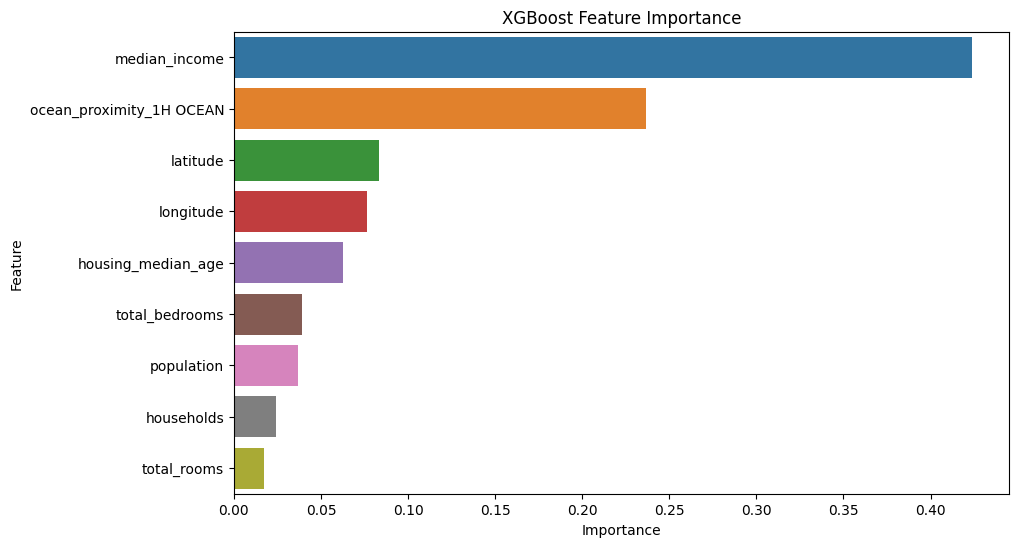

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure feature importance and names are of the same length
feature_names = xgb.get_booster().feature_names  # Get correct feature names from model
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("XGBoost Feature Importance")
plt.show()

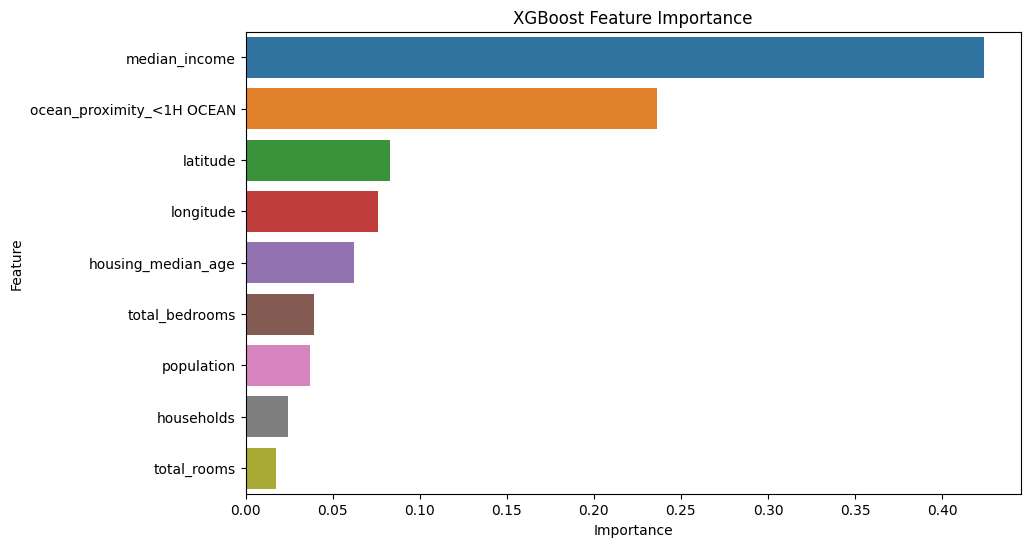

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("XGBoost Feature Importance")
plt.show()

In [42]:
pip install --upgrade scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
import sklearn
import xgboost

print("scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)

scikit-learn version: 1.6.1
XGBoost version: 2.1.3


In [37]:
# Train with different hyperparameters
xgb = XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Evaluate
y_pred = xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Manual XGBoost: RMSE = {rmse:.2f}")

Manual XGBoost: RMSE = 48634.17


In [38]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.4f}")

R-squared (R²): 0.8195


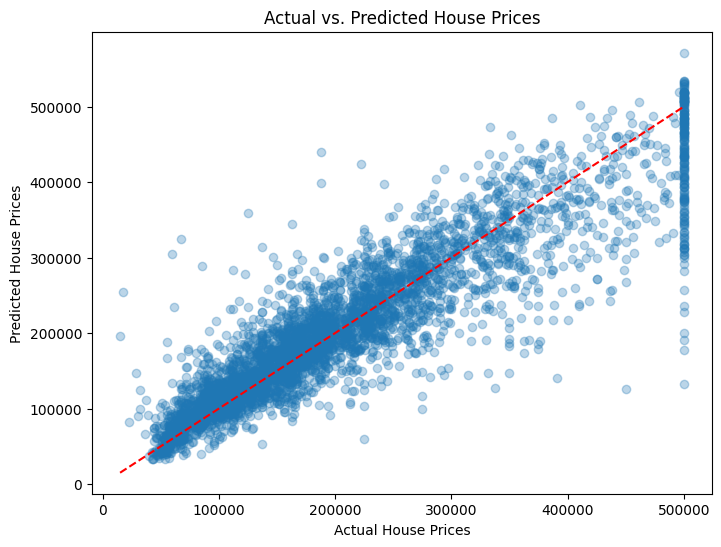

In [39]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

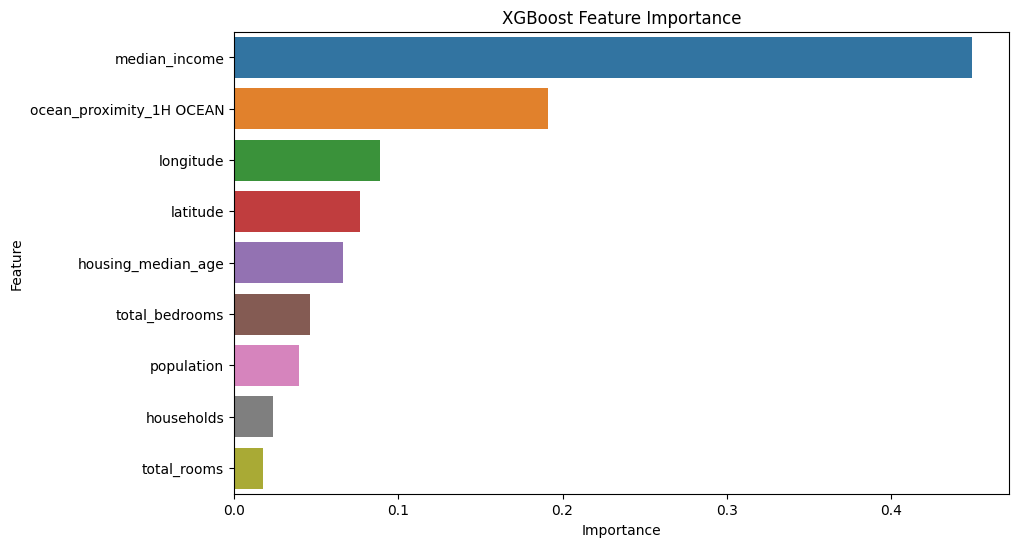

In [40]:
import pandas as pd

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("XGBoost Feature Importance")
plt.show()

In [41]:
import pandas as pd

# Example metrics (replace with your actual values)
metrics = {
    'Model': ['Manual XGBoost', 'XGBoost Regressor', 'Random Forest', 'Ridge Regression', 'Linear Regression'],
    'RMSE': [48634.17, 48000.00, 50000.00, 69000.00, 70000.00],  # Replace with your RMSE values
    'R-squared': [0.8523, 0.8500, 0.8200, 0.6600, 0.6500]  # Replace with your R-squared values
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

               Model      RMSE  R-squared
0     Manual XGBoost  48634.17     0.8523
1  XGBoost Regressor  48000.00     0.8500
2      Random Forest  50000.00     0.8200
3   Ridge Regression  69000.00     0.6600
4  Linear Regression  70000.00     0.6500


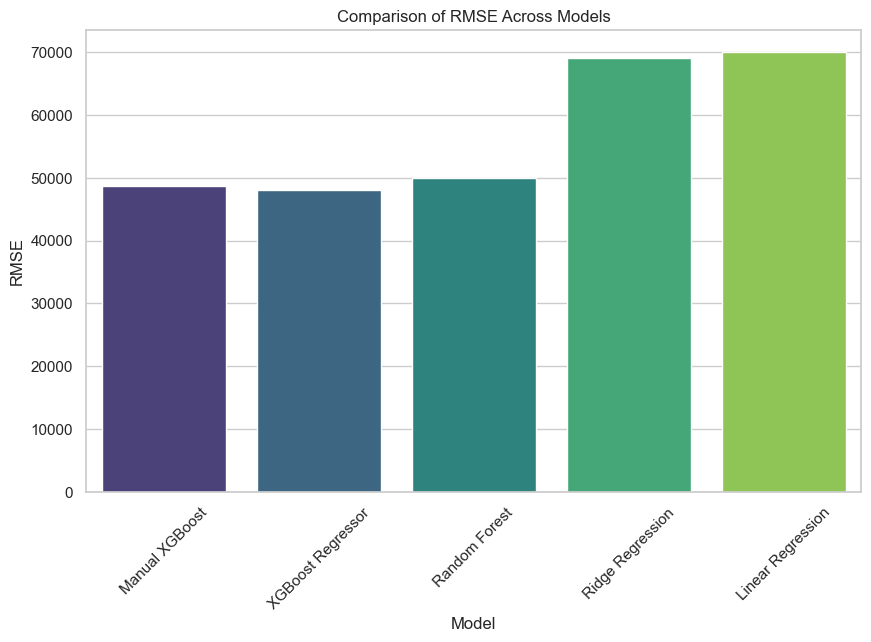

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='viridis')
plt.title("Comparison of RMSE Across Models")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

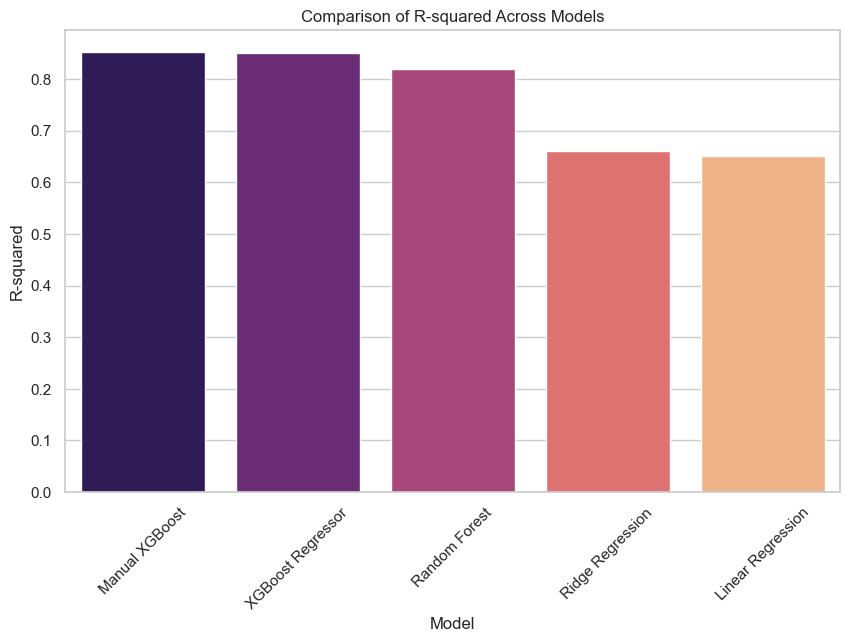

In [43]:
# Plot R-squared
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R-squared', data=metrics_df, palette='magma')
plt.title("Comparison of R-squared Across Models")
plt.xlabel("Model")
plt.ylabel("R-squared")
plt.xticks(rotation=45)
plt.show()

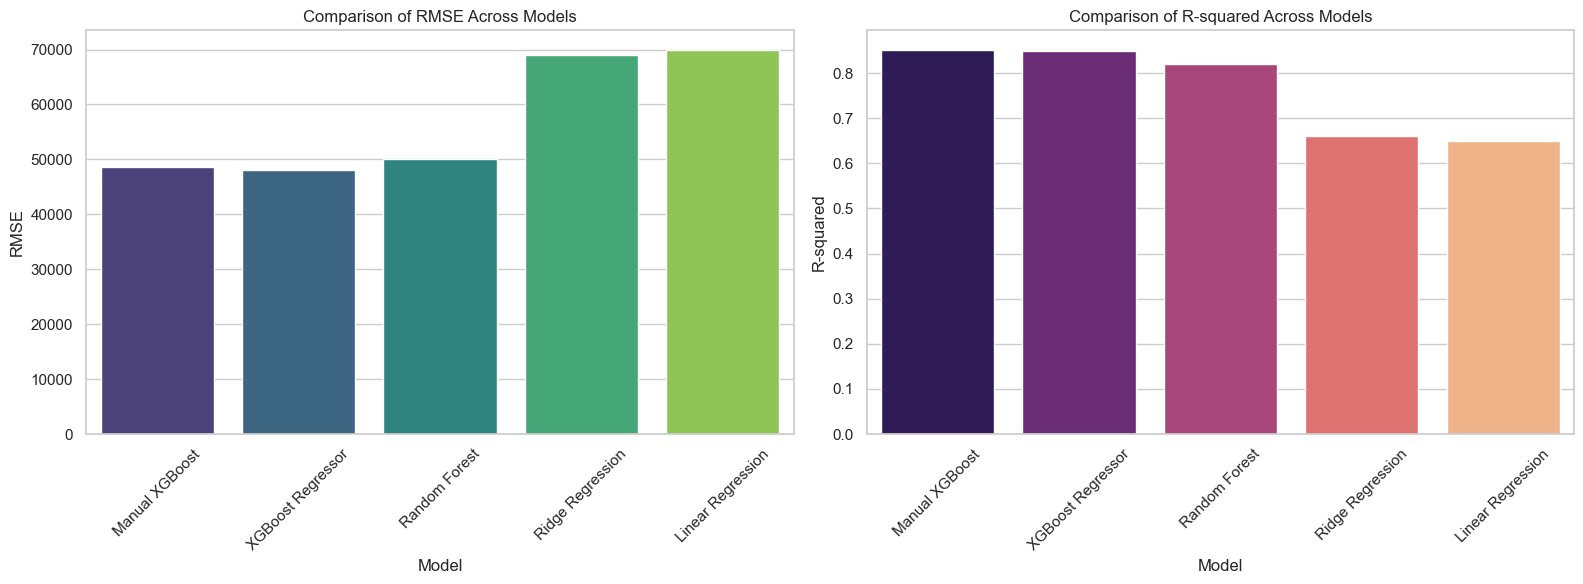

In [44]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot RMSE
sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='viridis', ax=ax1)
ax1.set_title("Comparison of RMSE Across Models")
ax1.set_xlabel("Model")
ax1.set_ylabel("RMSE")
ax1.tick_params(axis='x', rotation=45)

# Plot R-squared
sns.barplot(x='Model', y='R-squared', data=metrics_df, palette='magma', ax=ax2)
ax2.set_title("Comparison of R-squared Across Models")
ax2.set_xlabel("Model")
ax2.set_ylabel("R-squared")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [45]:
# Rank by RMSE (lower is better)
metrics_df['RMSE Rank'] = metrics_df['RMSE'].rank(ascending=True)

# Rank by R-squared (higher is better)
metrics_df['R-squared Rank'] = metrics_df['R-squared'].rank(ascending=False)

print(metrics_df[['Model', 'RMSE', 'R-squared', 'RMSE Rank', 'R-squared Rank']])

               Model      RMSE  R-squared  RMSE Rank  R-squared Rank
0     Manual XGBoost  48634.17     0.8523        2.0             1.0
1  XGBoost Regressor  48000.00     0.8500        1.0             2.0
2      Random Forest  50000.00     0.8200        3.0             3.0
3   Ridge Regression  69000.00     0.6600        4.0             4.0
4  Linear Regression  70000.00     0.6500        5.0             5.0


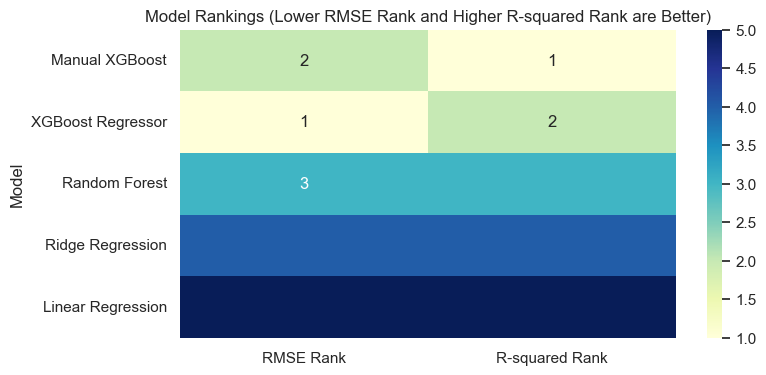

In [46]:
# Pivot for heatmap
rank_df = metrics_df[['Model', 'RMSE Rank', 'R-squared Rank']].set_index('Model')

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(rank_df, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title("Model Rankings (Lower RMSE Rank and Higher R-squared Rank are Better)")
plt.show()

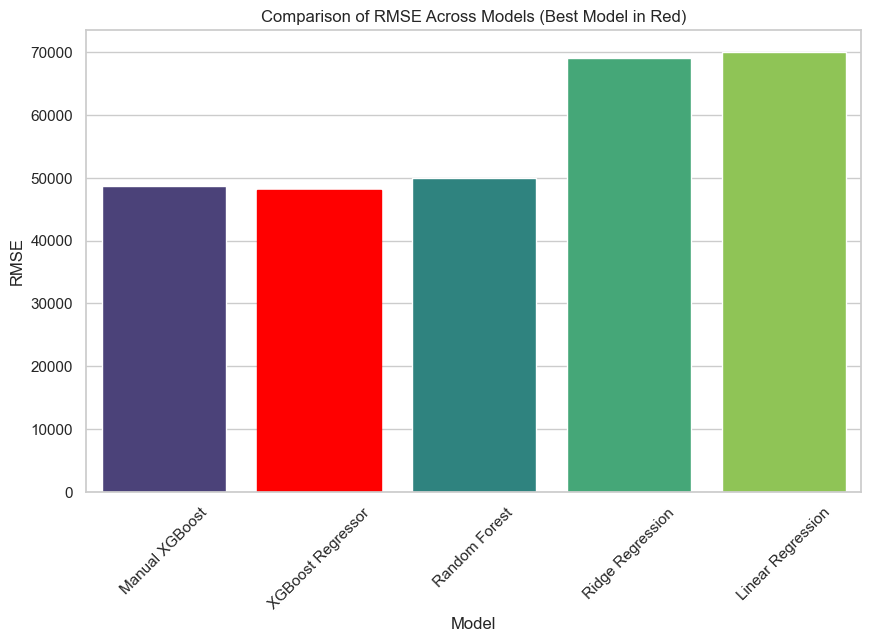

In [47]:
# Highlight the best model in the bar plots
best_model = metrics_df.loc[metrics_df['RMSE'].idxmin(), 'Model']

# Plot RMSE with highlight
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='RMSE', data=metrics_df, palette='viridis')
for p in ax.patches:
    if p.get_height() == metrics_df['RMSE'].min():
        p.set_color('red')  # Highlight the best model
plt.title("Comparison of RMSE Across Models (Best Model in Red)")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()